<a href="https://colab.research.google.com/github/silviabarasa/Data-cleaning/blob/master/practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9808 entries, 0 to 9807
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9808 non-null   object
 1   Unnamed: 1  9808 non-null   object
dtypes: object(2)
memory usage: 153.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


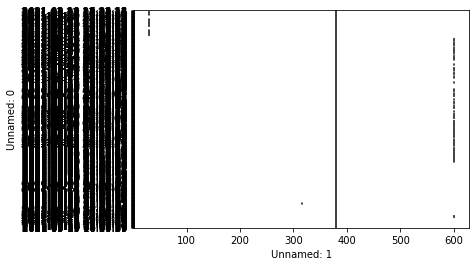

In [26]:
import pandas as pd
df=pd.read_csv('/content/parameters-over-time .csv')
df.head()
df.shape
df.columns
df.info()
# Checking for null values
df.isnull().sum()
# Checking for duplicates
df.duplicated().sum()
df1= df.iloc[1:9808, 0:2]
df1.head()
df3=df1.loc[df1['Unnamed: 1']> '0.00']
import seaborn as sns
df3['Unnamed: 1']= df3['Unnamed: 1'].apply(pd.to_numeric, errors='coerce')
#df3['Unnamed: 0']= df3['Unnamed: 0'].apply(pd.to_numeric, errors='coerce')
print(sns.boxplot(y=df3['Unnamed: 0'],x=df3['Unnamed: 1']))
#Outliers
# checking for outliers using IQR Scores
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
sd= (df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))
sd.shape

# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the whole dataset is important for my analysis

df_no_outlier = df3[~((df3 < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).any(axis = 1)]

df_no_outlier.shape
import seaborn as sns
print(sns.boxplot(y=df_no_outlier['Unnamed: 0'],x=df_no_outlier['Unnamed: 1']))
# Export the csv
df3.to_csv("cleaned.csv")